# Khai báo thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Xem thông tin của dữ liệu
+ Sử dụng method info()
+ Sử dụng method isnull()
+ Sử dụng pd.hist()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

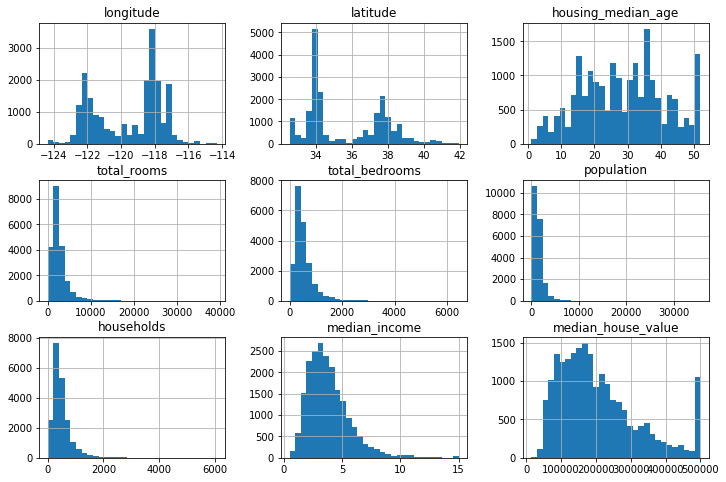

In [5]:
df.hist(bins=30,figsize=(12,8))
plt.show()

# Chia tập dữ liệu

In [6]:
df_labels=df['median_house_value']
df_labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

# Xử lý dữ liệu bị khuyết
+ **Biến số học**
    + Sử dụng fillna(): median
    + Chuẩn hóa đưa về phân phối chuẩn tắc với mean = 0, std = 1
+ **Biến phân loại**
    + Dùng Onehotencoder() đưa về dạng vector
    
        + Example: Có 3 biến trong trường Hocsinh là Tung, Khanh, Hai.
        
            Qua Onehot sẽ thành 3 vector [1,0,0], [0,1,0], [0,0,1].
        

In [7]:
df_num =df.drop("ocean_proximity", axis=1)
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attr=['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
cat_attr = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
    ])

df_pre = full_pipeline.fit_transform(df)

df_pre.shape

(20640, 11)

## Chia tập dữ liệu train và test

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_pre,df_labels,test_size=0.2, random_state=42)

In [11]:
X_train.shape

(16512, 11)

## Xây dựng hàm đánh giá

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def Evaluate(y_train,y_pred):
    mse=mean_squared_error(y_train, y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_train, y_pred)
    print("Mean squared error:",rmse)

    print("Mean absolute error:",mae)

# Xây dựng mô hình
+ KNN
+ SVM kernel
+ Decision Tree

## KKN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_neighbors=2)
KNN_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [14]:
y_pred_1=KNN_reg.predict(X_train)
Evaluate(y_train,y_pred_1)

Mean squared error: 40772.029193710674
Mean absolute error: 27803.924539728683


## SVM

In [15]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=4, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X_train, y_train)
y_pred_2 = svm_poly_reg.predict(X_train)

In [16]:
Evaluate(y_train,y_pred_2)

Mean squared error: 108025.5548029497
Mean absolute error: 80439.31623310126


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=25,random_state=42)
tree_reg.fit(X_train,y_train)
y_pred_3 = tree_reg.predict(X_train)

In [18]:
Evaluate(y_train,y_pred_3)

Mean squared error: 2907.5985862018356
Mean absolute error: 470.0248678937974


# Dự đoán

In [19]:
new_data = df.iloc[:5]
new_labels = df_labels.iloc[:5]
new_data_pre = full_pipeline.transform(new_data)

print("Giá trị dự đoán:", tree_reg.predict(new_data_pre))
print("Giá trị thật:",list(new_labels))

Giá trị dự đoán: [500001. 358500. 352100. 365900. 342200.]
Giá trị thật: [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


## Kiểm định chéo

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_pre, df_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_scores = np.sqrt(-scores)

In [21]:
tree_scores

array([91101.57789595, 92693.76718096, 85882.62181813, 96508.28794722,
       89539.8696785 ])

In [22]:
tree_scores.mean()

91145.22490415386